# Práctica 3

date: 09/09/2023  
File: practica_3.py  
Author : Pablo Naim Chehade   
Email: pablo.chehade.villalba@gmail.com  
GitHub: https://github.com/Lupama2  

In [1]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Hago los gráficos interactivos
%matplotlib ipympl

In [2]:
#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [3]:
#Import data .dat
spikes = np.loadtxt('spikes.dat')
stimulus = np.loadtxt('stimulus.dat')

## Ejercicio 1

In [4]:
#Grafico en el tiempo una realización
# fig, ax = plt.subplots(1,1)
# ax.plot(spikes[0,:][:1000], 'o-')


In [5]:
def ISI_calculation(realizacion):
    #Calculo los ISI de una realización
    #realizacion es un vector de 0 y 1
    #Devuelve un vector con los ISI en unidades de 0.1 ms
    ISI = []
    index_last_spike = 0
    for i in range(1,len(realizacion)):
        if realizacion[i] == 1:
            ISI.append(i-index_last_spike)
            index_last_spike = i
    return np.array(ISI)

def ISI_total_calculation(realizaciones):
    #Calculo los ISI de todas las realizaciones
    #realizaciones es una matriz de 0 y 1
    #Devuelve un vector con los ISI en unidades de 0.1 ms
    ISI = np.array([])
    for realizacion in realizaciones:
        ISI = np.concatenate([ISI, ISI_calculation(realizacion)])
    return ISI

In [6]:
ISI_total = ISI_total_calculation(spikes)

In [7]:
factor_to_ms = 1/10

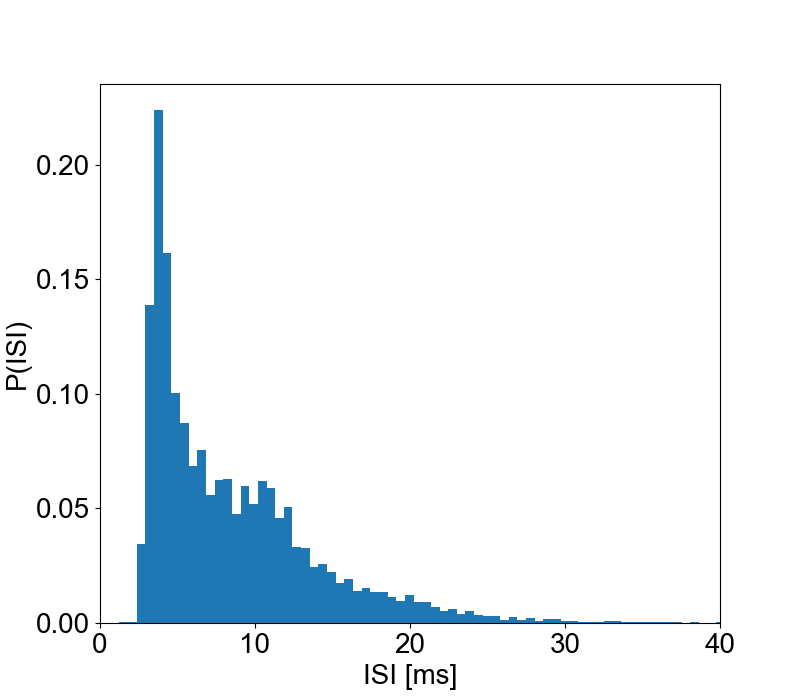

In [8]:
#Grafico el histograma normalizado de los ISI

fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.hist(ISI_total*factor_to_ms, bins=100, density = True) #density=True
ax.set_xlabel('ISI [ms]')
ax.set_ylabel('P(ISI)')
ax.set_xlim([0,40])

plt.show()

#Guardo la figura
fig.savefig('Informe/ISI_histogram.png', bbox_inches='tight')


In [9]:
#Calculo media, desviación estandar y CV
media = np.mean(ISI_total)
desvio = np.std(ISI_total)
CV = desvio/media

#Imprimo datos
print(f'Media: {media*factor_to_ms} [ms]')
print(f'Desviación estandar: {desvio*factor_to_ms} [ms]')
print(f'CV: {CV}')




Media: 8.569324533638628 [ms]
Desviación estandar: 5.632006758066682 [ms]
CV: 0.6572287857646664


## Ejercicio 2

In [10]:
def N_calculation(realizaciones):
    #Calculo N
    #Devuelve un vector con los N
    return np.sum(realizaciones, axis=1)

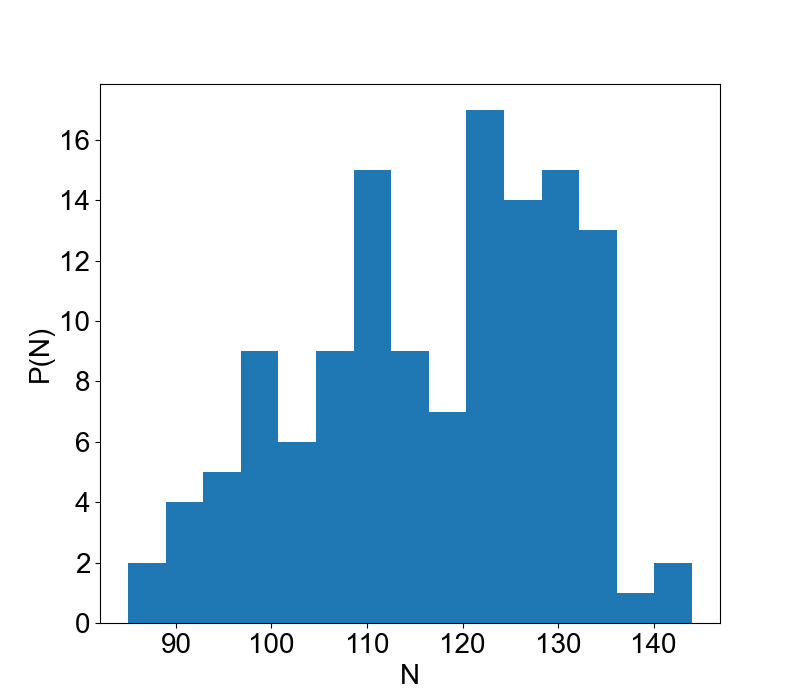

In [11]:
#Histograma de Ns normalizado

fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.hist(N_calculation(spikes), bins=15) #density=True
ax.set_xlabel('N')
ax.set_ylabel('P(N)')

plt.show()

#Guardo figura
fig.savefig('Informe/N_histogram.png', bbox_inches='tight')



In [12]:
#Calculo media, desviación estándar y factor de Fano
media = np.mean(N_calculation(spikes))
desvio = np.std(N_calculation(spikes))
Fano = desvio**2/media

#Imprimo datos
print(f'Media: {media}')
print(f'Desviación estandar: {desvio}')
print(f'Fano: {Fano}')


Media: 117.0078125
Desviación estandar: 13.534964036333593
Fano: 1.5656668349803031


### ¿El proceso es tipo "renewal"?

In [13]:
#Veo si se cumple la relación F = CV^2
print(f'F = {Fano}')
print(f'CV^2 = {CV**2}')



F = 1.5656668349803031
CV^2 = 0.43194967683769775


## Ejercicio 3

In [14]:
def firing_rate_total_calculation(realizaciones, T):
    '''
    Calculo la tasa de disparo usando una caja de ancho T expresada en unidades de 0.1 ms, es decir, como índice. Tiene que ser múltiplo de 2
    '''
    N_realizaciones = len(realizaciones)
    return np.convolve(np.sum(realizaciones, axis = 0), np.ones(T), mode = "same")/T/N_realizaciones


In [15]:
#Grafico la tasa de disparo
def plt_tasa_de_disparo(T, save = False):

    fig, ax = plt.subplots(1,1, figsize=(8,6))
    y_vec = firing_rate_total_calculation(spikes[:,1:], T)/factor_to_ms*1e3
    x_vec = np.arange(len(y_vec))*factor_to_ms
    ax.plot(x_vec, y_vec)
    ax.set_xlabel('Tiempo [ms]')
    ax.set_ylabel('Tasa de disparo [Hz]')
    plt.show()

    if save == True:
        fig.savefig(f'Informe/tasa_de_disparo_{T}.png', bbox_inches='tight')


#Scrolleo T con un slider usando widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(plt_tasa_de_disparo, T=widgets.IntSlider(min=2, max=1000, step=2, value=10));



interactive(children=(IntSlider(value=10, description='T', max=1000, min=2, step=2), Checkbox(value=False, des…

## Ejercicio 4

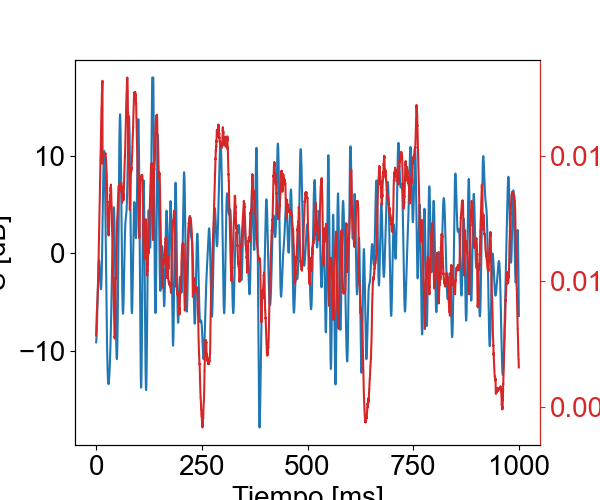

In [16]:
#Grafico stimulus y rate en la misma figura pero distintos ejes

fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(stimulus[:,0], stimulus[:,1], color = "tab:blue")
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('S [dB]')

ax2 = ax.twinx()
T = 300
ax2.plot(np.arange(len(spikes[0]))*factor_to_ms, firing_rate_total_calculation(spikes, T), color = "tab:red")
ax2.set_xlabel('Tiempo [ms]')
ax2.set_ylabel('r', color = "tab:red")
#Cambio el color del eje y de los labels
ax2.spines['right'].set_color('tab:red')
ax2.tick_params(axis='y', colors='tab:red')

plt.show()

In [17]:
#Calculo t_SPIKES
def t_spikes_calculation(realizacion):
    #Calculo los tiempos a los que se da un spike (t_spkies) de una realización
    #realizacion es un vector de 0 y 1
    #Devuelve un vector con los t_spikes en unidades de 0.1 ms

    tiempos = np.array(realizacion)*np.linspace(0, len(realizacion), len(realizacion))
    #Descarto tiempos nulos
    t_spike = tiempos[tiempos != 0]
    
    return t_spike

def t_spikes_total_calculation(realizaciones):
    #Calculo los tiempos a los que se da un spike (t_spkies) de todas las realizaciones
    #realizaciones es una matriz de 0 y 1
    #Devuelve un vector con los t_spikes en unidades de 0.1 ms
    t_spike = np.array([])
    for realizacion in realizaciones:
        t_spike = np.concatenate([t_spike, t_spikes_calculation(realizacion)])
    return t_spike

t_spikes_total = t_spikes_total_calculation(spikes)

In [18]:
def kernel_lineal(t, t_spikes_total, stimulus_vec):
    '''
    Calcula D*sigma**2 expresado en unidades de dB
    t [0.1 ms]
    '''

    #Calculo la diferencia entre tiempos
    dif = t_spikes_total - t
    
    #Convierto el array de float a array de int
    dif = np.array(dif, dtype=int)

    #Elimino elementos negativos
    dif = dif[dif >= 0]

    #Evalúo S en dif como índices
    S_dif = stimulus_vec[dif]

    #Calculo D
    D = np.sum(S_dif)

    return D

def kernel_constante(realizaciones):
    '''
    Calcula r0: valor medio de la tasa de disparo expresado en unidades de 1/0.1 ms
    
    '''
    # T = int(len(realizaciones)) #Tamaño total de la caja en [0.1 ms]
    # return firing_rate_calculation(T/2, realizaciones, T) #Ya está normalizado por 1/T. Entonces queda en unidades de [1/0.1 ms]

    # return np.mean(np.sum(realizaciones, axis = 0)) #Ya está normalizado por 1/T. Entonces queda en unidades de [1/0.1 ms]
    return np.mean(realizaciones)



In [19]:
#Calculo kernel_lineal y kernel_constante
D_vec = np.empty(len(stimulus[:,0]))

t_spikes_total = t_spikes_total_calculation(spikes)


for i in range(len(stimulus[:,0])):
    D_vec[i] = kernel_lineal(i, t_spikes_total, stimulus[:,1])

r0 = kernel_constante(spikes[:,1:])
print(f"r0 = {r0/factor_to_ms*1e3} [Hz]")

r0 = 116.01941444144414 [Hz]


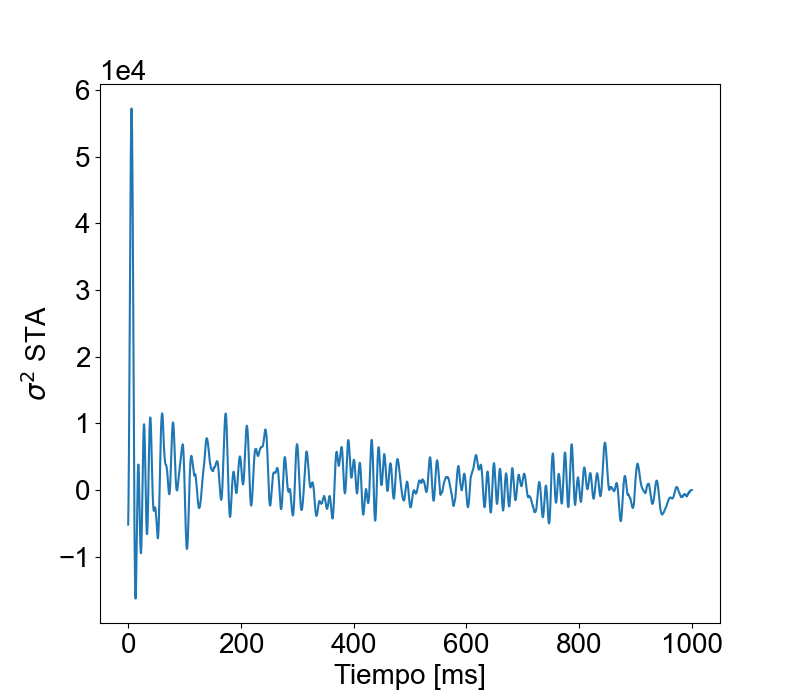

In [20]:
#Grafico D
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.plot(np.arange(len(stimulus[:,0]))*factor_to_ms, D_vec, color = "tab:blue")
#Expreso el eje y en forma científica
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# ax.plot(t_spikes_total)-
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('$\sigma^2$ STA')
plt.show()

#Guardo la figura
fig.savefig('Informe/STA_total.png', bbox_inches='tight')


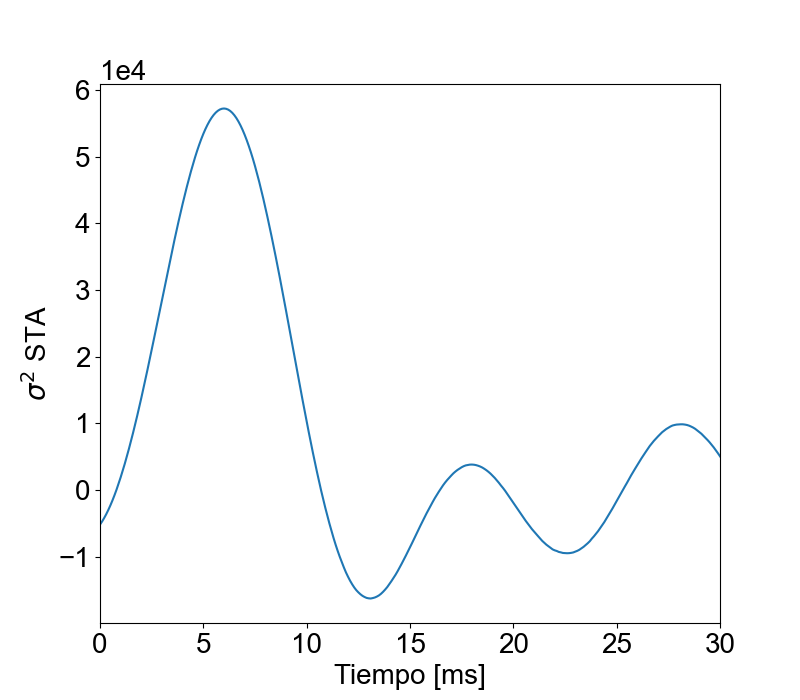

In [21]:
#Grafico D
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.plot(np.arange(len(stimulus[:,0]))*factor_to_ms, D_vec, color = "tab:blue")
#Expreso el eje y en forma científica
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# ax.plot(t_spikes_total)-
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('$\sigma^2$ STA')
ax.set_xlim([0,30])
plt.show()

#Guardo la figura
fig.savefig('Informe/STA_parcial.png', bbox_inches='tight')

In [22]:
def modelo_lineal(r0, D_vec, stimulus_vec):
    '''
    Calcula la tasa de disparo r con el modelo lineal en función de r0, D_vec y stimulus. 
    r(t) = r0 + int_0^infty D(t')*stimulus(t-t')
    '''
    r_model = np.empty(len(stimulus_vec))
    Delta_t = factor_to_ms #Esta igualdad es una casualidad
    
    for t in range(len(stimulus_vec)):

        integral = 0
        

        T0 = 300 #[0.1 ms]. Límite superior de la integral

        if t < T0: #En esa regió no puedo hacer la integral
            r_model[t] = 0
        else: 
            for tau in range(T0):
                integral += D_vec[tau]*stimulus_vec[t-tau]*Delta_t
            r_model[t] = integral

    return r_model



r_model_vec = modelo_lineal(r0, D_vec, stimulus[:,1])

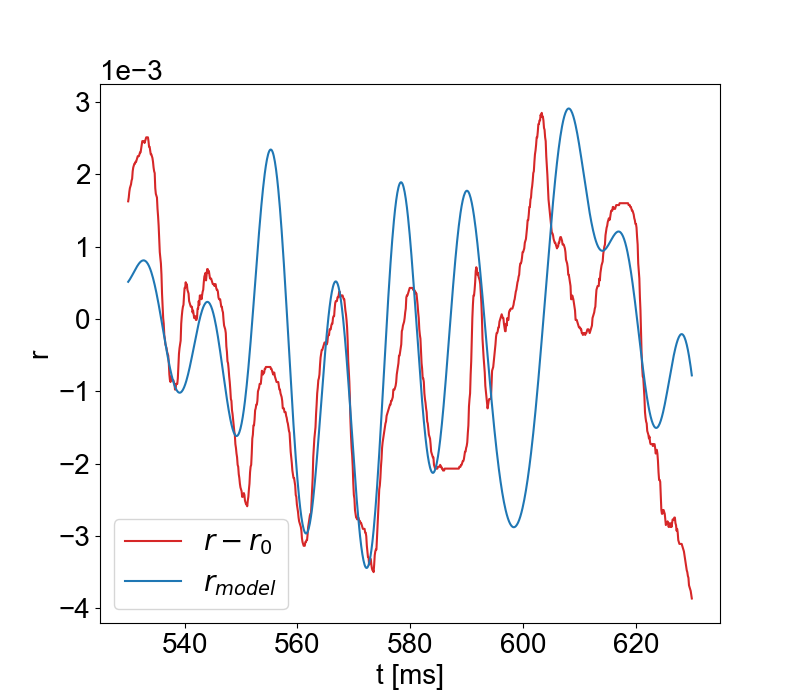

In [28]:
#Grafico r y r_model
fig, ax = plt.subplots(1,1, figsize=(8,7))
T = 300
r_vec = firing_rate_total_calculation(spikes[:,1:], T)

ind_min = 5300
ind_max = 6300

ax.plot(np.arange(len(r_vec))[ind_min:ind_max]*factor_to_ms, (r_vec - r0)[ind_min:ind_max], color = "tab:red", label = "$r - r_0$")
ax.plot(stimulus[:,0][ind_min:ind_max], r_model_vec[ind_min:ind_max]/1e9, color = "tab:blue", label = "$r_{model}$")


#Expreso eje y en forma científica
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# ax.plot(r_model_vec[:-1], r_vec, color = "tab:blue", label = "r_model")

ax.set_ylabel('r')
ax.set_xlabel('t [ms]')
ax.legend()
plt.show()

#Guardo figura
fig.savefig('Informe/r_vs_r_model.png', bbox_inches='tight')

Por cómo está calculada la integral, no tiene mucho sentido la cuenta para tiempos muy grandes

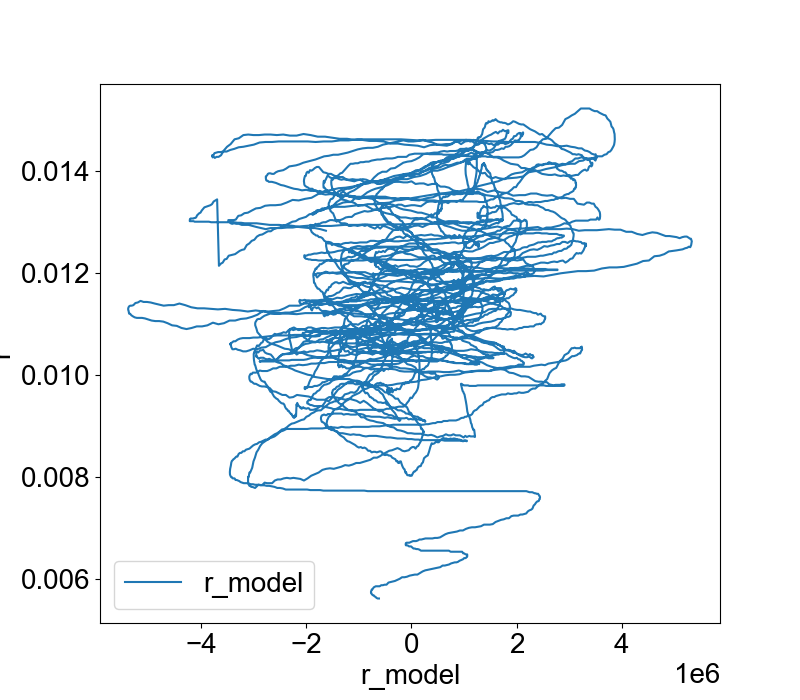

In [24]:
#Grafico r y r_model

T = 750
r_vec = firing_rate_total_calculation(spikes, T)

T0 = 300
ind_ini = T0
ind_fin = len(r_model_vec) -1
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.plot(r_model_vec[ind_ini:ind_fin], r_vec[ind_ini:ind_fin], color = "tab:blue", label = "r_model")

ax.set_xlabel('r_model')
ax.set_ylabel('r')
ax.legend()
plt.show() 

NameError: name 'new_firing_rate' is not defined

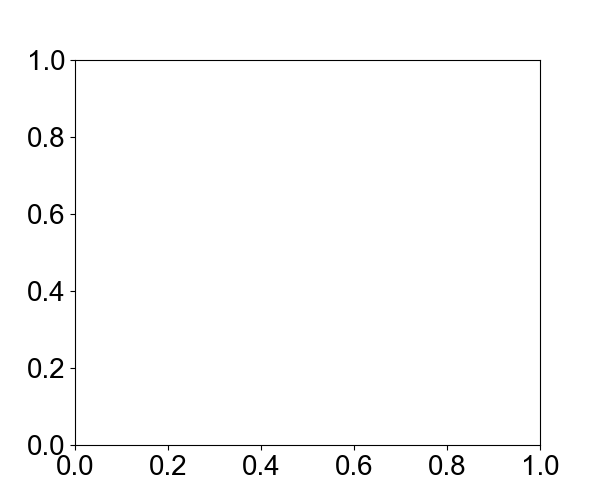

In [25]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(np.arange(len(new_firing_rate))*factor_to_ms, new_firing_rate)
ax.plot(np.arange(len(r_model_vec))*factor_to_ms, r_model_vec/1e7)
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('Tasa de disparo [Hz]')
plt.show()


fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(r_model_vec[:-1]/1e7, new_firing_rate)

ax.set_xlabel('r_MODEL')
ax.set_ylabel('r')
plt.show()